In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn_pandas import gen_features, DataFrameMapper
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline
plt.rcParams['xtick.labelsize'] = 10
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [6]:
df.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [7]:
df['user_name'].count()

63264

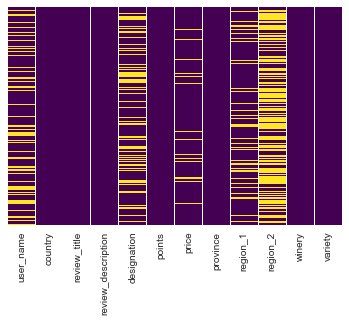

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#replacing missing values in the price column with the mean value
df['price'].fillna(value=df['price'].mean(),inplace=True)

#dropping rows of the dataframe where NaN values are present in the 'designation' column
df = df[df['designation'].notna()]

# plt.figure(figsize=(8,4))
# sns.countplot(df['region_2'][df['region_2'].notna()])
# f = plt.xticks(rotation=90)

df = df[df['region_1'].notna()]

df = df[df['user_name'].notna()]

df.drop('region_2',axis=1,inplace=True)

df.reset_index(drop=True,inplace=True)

In [127]:
X = df[df.columns[:-1]]

In [128]:
y = df[df.columns[-1]]

In [130]:
dic = {'class': CountVectorizer, 'stop_words':'english', 'strip_accents':'unicode','token_pattern':r'\w{2,}', 'min_df':5}

In [131]:
feature_def = gen_features(columns=['user_name', 'country', 'review_title', 'review_description',
       'designation', 'province', 'region_1', 'winery'],classes=[dic,TfidfTransformer])

In [132]:
mapper = DataFrameMapper(feature_def)

In [133]:
X = mapper.fit_transform(X.drop(['points','price'],axis=1))

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [135]:
X_train.shape

(25370, 17515)

In [141]:
sgd = SGDClassifier().fit(X_train,y_train)

In [142]:
y_pred = sgd.predict(X_test)

In [144]:
print(classification_report(y_test,y_pred))

                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.88      0.89      0.88       646
Bordeaux-style White Blend       0.86      0.74      0.80        93
            Cabernet Franc       0.95      0.99      0.97       143
        Cabernet Sauvignon       1.00      1.00      1.00       743
           Champagne Blend       1.00      0.97      0.98       308
                Chardonnay       1.00      0.98      0.99      1223
                     Gamay       0.99      0.99      0.99       196
            Gewürztraminer       1.00      1.00      1.00       124
          Grüner Veltliner       1.00      1.00      1.00        10
                    Malbec       1.00      1.00      1.00       452
                    Merlot       0.99      0.94      0.97       181
                  Nebbiolo       0.99      1.00      1.00       389
              Pinot Grigio       1.00      1.00      1.00        39
                Pinot Gris       1.00      1.00

In [145]:
test_data = pd.read_csv('test.csv')

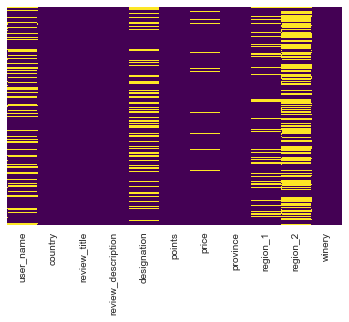

In [146]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [147]:
test_data['price'].fillna(value=test_data['price'].mean(),inplace=True)

#dropping rows of the dataframe where NaN values are present in the 'designation' column
test_data = test_data[test_data['designation'].notna()]

test_data = test_data[test_data['region_1'].notna()]

test_data = test_data[test_data['user_name'].notna()]

test_data.drop('region_2',axis=1,inplace=True)

test_data.reset_index(drop=True,inplace=True)

In [148]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           8976 non-null   object 
 1   country             8976 non-null   object 
 2   review_title        8976 non-null   object 
 3   review_description  8976 non-null   object 
 4   designation         8976 non-null   object 
 5   points              8976 non-null   int64  
 6   price               8976 non-null   float64
 7   province            8976 non-null   object 
 8   region_1            8976 non-null   object 
 9   winery              8976 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 701.4+ KB


In [149]:
test_data = mapper.transform(test_data.drop(['points','price'],axis=1))

In [150]:
test_data.shape

(8976, 17515)

In [151]:
y_pred = sgd.predict(test_data)